# evaluation of peak prediction

In [1]:
import os
import pandas as pd
import pandas as pd
def get_N_target(peaks,tad,gtf,cap,deg):
    deg = "/home/yli11/dirs/NFIX_megan/NFIX_integrative_analysis/NFIX_direct_targets/"+deg
    TAD_command="bed_TAD_gene.py %s %s %s"%(peaks,tad,gtf)

    nearest_gene_command="module load homer/4.10;annotatePeaks.pl %s mm9 -gtf %s > %s.annot.txt"%(peaks,gtf,peaks)

    captureC_command = "bed_Capture_gene.py %s %s"%(peaks,cap)

    os.system(TAD_command)
    os.system(captureC_command)
    os.system(nearest_gene_command)

    command = 'sed "1d" %s.annot.txt | cut -f 16 > %s.list1'%(peaks,peaks)
    os.system(command)
    command = 'cat %s.TAD.gene.bed | cut -f 4 > %s.list2'%(peaks,peaks)
    os.system(command)
    command = 'cat %s.capC.gene.bed | cut -f 5 > %s.list3'%(peaks,peaks)
    os.system(command)

    command = "cat {0}.list1 {0}.list2 {0}.list3 > {0}.target2.list".format(peaks)
    os.system(command)
    # filter by DEG

    
    # deg = sys.argv[5]
    df = pd.read_csv(deg,sep="\t")
    total_list = pd.read_csv("%s.target2.list"%(peaks),header=None)
    overlap = set(df.index).intersection(total_list[0])
    df = df.loc[overlap]
    # df.to_csv("%s.direct_targets.all.tsv"%(deg.split("/")[-1]),sep="\t")
    os.system("rm {0}.list1 {0}.list2 {0}.list3".format(peaks))
    return df


    


In [ ]:
df = pd.read_csv("input.list",sep="\t",header=None)

In [ ]:
df.head()

,0,1,2
0,ClusterCMP.DEG.orig.ident.logFC02.FDR001.tsv,CMP.04.peaks.bed,CMP
1,ClusterLT-HSC.1.DEG.orig.ident.logFC02.FDR001.tsv,LTHSC.04.peaks.bed,LTHSC.1
2,ClusterMPP.DEG.orig.ident.logFC02.FDR001.tsv,MPP.04.peaks.bed,MPP
3,ClusterERP.DEG.orig.ident.logFC02.FDR001.tsv,CFUe.04.peaks.bed,CFUe
4,ClusterLT-HSC.2.DEG.orig.ident.logFC02.FDR001.tsv,LTHSC.04.peaks.bed,LTHSC.2


In [12]:
tad = "GSE119347_BMHSC_TADs.bed.gz"
gtf = "Mus_musculus.mm10_mm9.93.filtered.gtf"
cap = "target.5kb.bed"
myDict = {}
for i,r in df.iterrows():
    label = r[1].split(".")[0]
    peak = f"{label}.top1k.bed"
    deg = r[0]
    df = get_N_target(peak, tad, gtf, cap, deg)
    myDict[label] = df
    print (label,df.shape[0])

CMP 23
LTHSC 49
MPP 66
CFUe 30
LTHSC 67
STHSC 26
Ery 20
MEP 75
STHSC 37
GMP 25
MEG 28


In [16]:
myDict['LTHSC']

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,fdr
Rps29,9.231036e-19,-0.209428,1.000,1.000,2.866514e-14,3.064704e-17
Lbhd2,1.456073e-03,-0.226814,0.068,0.133,1.000000e+00,2.118153e-03
Cyp51,6.925100e-05,0.254279,0.268,0.143,1.000000e+00,1.871477e-04
Uvssa,9.553029e-05,0.214020,0.321,0.185,1.000000e+00,2.233525e-04
Aplp2,2.550199e-03,0.203170,0.566,0.425,1.000000e+00,3.359785e-03
...,...,...,...,...,...,...
Chic2,2.002426e-05,0.240949,0.445,0.273,6.218134e-01,6.648055e-05
Alad,5.624297e-05,-0.342183,0.291,0.393,1.000000e+00,1.637953e-04
Sptan1,6.160820e-05,0.237249,0.347,0.201,1.000000e+00,1.733383e-04
Eps8,6.161042e-04,-0.203385,0.045,0.107,1.000000e+00,9.929447e-04


In [19]:
df

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,fdr
Zcchc6,6.247293e-07,0.204626,0.701,0.571,1.939972e-02,1.084089e-06
Myl6,1.440923e-15,0.219561,0.996,0.987,4.474500e-11,7.728590e-15
Cks2,7.009241e-04,-0.239465,0.770,0.800,1.000000e+00,8.108730e-04
Tubb5,1.287423e-04,-0.223723,0.901,0.909,1.000000e+00,1.550162e-04
Pgam1,8.489202e-04,-0.200903,0.602,0.638,1.000000e+00,9.631980e-04
Arhgdib,1.747866e-14,-0.451046,0.828,0.879,5.427649e-10,7.932623e-14
H2-T22,2.245551e-08,0.209168,0.598,0.445,6.973111e-04,4.906946e-08
Lgals1,3.322279e-14,-0.458501,0.129,0.273,1.031667e-09,1.400103e-13
Tspan32,1.663406e-20,0.340548,0.896,0.747,5.165376e-16,1.226762e-19
Cox6c,8.741431e-10,-0.229940,0.942,0.960,2.714477e-05,2.455926e-09


In [17]:
for i in myDict:
    myDict[i].to_csv(f"{i}.direct_targets.csv")

In [4]:
predict_peak={}
predict_peak["CMP"]=23
predict_peak["MPP"]=66
predict_peak["CFUe"]=30
predict_peak["Ery"]=20
predict_peak["MEP"]=75
predict_peak["GMP"]=25
predict_peak["MEG"]=28
predict_peak["LTHSC.1"]=49
predict_peak["LTHSC.2"]=67
predict_peak["STHSC.1"]=26
predict_peak["STHSC.2"]=37

In [2]:
background = pd.DataFrame()
import glob
files = glob.glob("*random.list")
for f in files:
    label = f.replace(".random.list","")
    df = pd.read_csv(f,header=None)[0].tolist()
    background[label] = df

In [31]:
import scipy

In [6]:
a=pd.DataFrame.from_dict(predict_peak,orient="index")

In [7]:
a=a.merge(background.transpose(),left_index=True,right_index=True)

In [8]:
a.head()

,0_x,0_y,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
CMP,23,19,14,16,15,14,13,14,18,14,...,15,14,13,13,13,14,16,10,12,21
MPP,66,41,41,55,36,33,40,42,43,49,...,43,50,46,44,38,33,33,44,39,40
CFUe,30,29,26,21,22,27,27,14,23,19,...,19,24,21,13,18,23,18,26,18,27
Ery,20,12,13,12,7,22,11,8,12,12,...,16,12,11,11,14,11,13,17,12,12
MEP,75,42,41,38,39,36,38,32,46,40,...,35,43,43,43,43,40,53,36,40,44


In [9]:
a.columns = list(range(101))

In [10]:
a.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
CMP,23,19,14,16,15,14,13,14,18,14,...,15,14,13,13,13,14,16,10,12,21
MPP,66,41,41,55,36,33,40,42,43,49,...,43,50,46,44,38,33,33,44,39,40
CFUe,30,29,26,21,22,27,27,14,23,19,...,19,24,21,13,18,23,18,26,18,27
Ery,20,12,13,12,7,22,11,8,12,12,...,16,12,11,11,14,11,13,17,12,12
MEP,75,42,41,38,39,36,38,32,46,40,...,35,43,43,43,43,40,53,36,40,44


In [13]:
p=[]
for i in range(1,101):
    p.append(ttest_rel(a[0],a[i]).pvalue)

In [15]:
import numpy as np

In [16]:
np.mean(p)

0.004948998912117675

In [12]:
from scipy.stats import ttest_rel

In [17]:
import seaborn as sns

In [18]:
a.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
CMP,23,19,14,16,15,14,13,14,18,14,...,15,14,13,13,13,14,16,10,12,21
MPP,66,41,41,55,36,33,40,42,43,49,...,43,50,46,44,38,33,33,44,39,40
CFUe,30,29,26,21,22,27,27,14,23,19,...,19,24,21,13,18,23,18,26,18,27
Ery,20,12,13,12,7,22,11,8,12,12,...,16,12,11,11,14,11,13,17,12,12
MEP,75,42,41,38,39,36,38,32,46,40,...,35,43,43,43,43,40,53,36,40,44


In [19]:
b = a.reset_index()

In [20]:
c = b.melt(id_vars="index")

In [21]:
c.head()

,index,variable,value
0,CMP,0,23
1,MPP,0,66
2,CFUe,0,30
3,Ery,0,20
4,MEP,0,75


In [22]:
c.variable = (c.variable>0).astype(int)

In [23]:
c.head()

,index,variable,value
0,CMP,0,23
1,MPP,0,66
2,CFUe,0,30
3,Ery,0,20
4,MEP,0,75


In [24]:
c.variable  = c.variable.replace({0:"peaks",1:'background'})

In [25]:
c.head()

,index,variable,value
0,CMP,peaks,23
1,MPP,peaks,66
2,CFUe,peaks,30
3,Ery,peaks,20
4,MEP,peaks,75


<ipython-input-28-da45c226d380>:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "width" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("barplot_co-binding-peaks_vs_background_DEG.pdf",bbox_inches='tight',width=6,height=4)
<ipython-input-28-da45c226d380>:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "height" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("barplot_co-binding-peaks_vs_background_DEG.pdf",bbox_inches='tight',width=6,height=4)


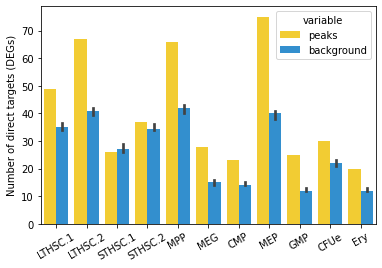

In [28]:
from numpy import median,mean
import matplotlib.pylab as plt
order=["LTHSC.1","LTHSC.2","STHSC.1","STHSC.2","MPP","MEG","CMP","MEP","GMP","CFUe","Ery"]
ax=sns.barplot(data=c,x="index",y="value",hue="variable",estimator=median,palette={'background':'#0073C2','peaks':'#EFC000'},
               saturation=1,alpha=0.8,order=order,color="black",linewidth=1)
plt.xticks(rotation=30)
plt.xlabel("")
plt.ylabel("Number of direct targets (DEGs)")
plt.savefig("barplot_co-binding-peaks_vs_background_DEG.pdf",bbox_inches='tight',width=6,height=4)


In [81]:
c.to_csv("~/dirs/chenggrp_221435_10x/analysis/single_cell2_yli11_2021-04-22/direct_targets.csv",index=False,header=False)

In [82]:
c['index'].unique()

array(['CMP', 'MPP', 'CFUe', 'Ery', 'MEP', 'GMP', 'MEG', 'LTHSC.1',
       'LTHSC.2', 'STHSC.1', 'STHSC.2'], dtype=object)

In [76]:
a[list(range(1,101))].median(axis=1)

CMP        14.0
MPP        42.0
CFUe       22.0
Ery        12.0
MEP        40.0
GMP        12.0
MEG        15.0
LTHSC.1    35.0
LTHSC.2    41.0
STHSC.1    27.0
STHSC.2    34.5
dtype: float64

In [77]:
c

,index,variable,value
0,CMP,peaks,23
1,MPP,peaks,66
2,CFUe,peaks,30
3,Ery,peaks,20
4,MEP,peaks,75
...,...,...,...
1106,MEG,background,12
1107,LTHSC.1,background,32
1108,LTHSC.2,background,41
1109,STHSC.1,background,39


In [78]:
c.head(n=20)

,index,variable,value
0,CMP,peaks,23
1,MPP,peaks,66
2,CFUe,peaks,30
3,Ery,peaks,20
4,MEP,peaks,75
5,GMP,peaks,25
6,MEG,peaks,28
7,LTHSC.1,peaks,49
8,LTHSC.2,peaks,67
9,STHSC.1,peaks,26


In [107]:
import glob
files = glob.glob("*random.list")
gene_list = []
for f in files:
    label = f.replace(".random.list","")
    genes = pd.read_csv(f"{label}.direct_targets.csv",index_col=0).index.tolist()
    gene_list += genes


In [110]:
len(list(set(gene_list)))

279

In [111]:
list(set(gene_list))

['Stxbp4',
 'Rras',
 'S100a11',
 'Ccdc88a',
 'Lbhd2',
 'Cyp51',
 'Oat',
 'Mrpl54',
 'Sdf2l1',
 'Uvssa',
 'Eci1',
 'Ehmt2',
 'Malat1',
 'Dalrd3',
 'Acss2',
 'Tubb5',
 'Pds5a',
 'Mosmo',
 'Trim34a',
 'Shisa5',
 'Hist1h2ap',
 'Tspo',
 'Pdcd4',
 'Uqcrq',
 'Birc5',
 'Meg3',
 'Mif',
 'Usp48',
 'Chaf1a',
 'Iigp1',
 'Rpl27',
 'Lgals1',
 'Cox6c',
 'Ctla2a',
 'Uqcrb',
 'Ubl5',
 'Aqp1',
 'Atp5k',
 'Prss57',
 'Atp8a1',
 'Ube2b',
 'Cela1',
 'Rgs1',
 'Rpl5',
 'Usp8',
 'Gm35082',
 'Pabpn1',
 '2410015M20Rik',
 'Kcnq1ot1',
 'Bcl2',
 'Ltb',
 'Gclm',
 'Vgll4',
 'Lars2',
 'Gnb4',
 'Etf1',
 'Gpr171',
 'Elane',
 'Tmem230',
 'Cd52',
 'Atp5j2',
 'Ccdc86',
 'Rps17',
 'Nceh1',
 'Prkag2',
 'Ranbp1',
 'Dbi',
 'Hspa9',
 'Uqcc2',
 'Mndal',
 'Clec12a',
 'Galnt6',
 'Cirbp',
 'Nop56',
 'Fam208b',
 'Rps7',
 'Rbck1',
 'Nkg7',
 'Cks2',
 'Gm2a',
 'Icam4',
 'Trim59',
 'Tspo2',
 'Rps28',
 'Snrpf',
 'Akap13',
 'Rrp1b',
 'Madd',
 'Rpl36al',
 'Arhgdib',
 'Tagln2',
 'Wdfy1',
 'Ebp',
 'Rps20',
 'Hint1',
 'Tspan32',
 'Lcn2',
 'Tt

#  DN

In [149]:
predict_peak={}
for i in myDict:
    if "HSC" in i:
        continue
    print (i)
    predict_peak[i] = myDict[i][myDict[i].avg_log2FC<0].shape[0]
for i in myDict2:
    print (i)
    predict_peak[i] = myDict2[i][myDict2[i].avg_log2FC<0].shape[0]

CMP
MPP
CFUe
Ery
MEP
GMP
MEG
LTHSC.1
LTHSC.2
STHSC.1
STHSC.2


In [150]:
files = glob.glob("*random.dn.up.list")
background = pd.DataFrame()
for f in files:
    label = f.replace(".random.dn.up.list","")
    df = pd.read_csv(f,header=None,sep="\t")[0].tolist()
    background[label] = df
a=pd.DataFrame.from_dict(predict_peak,orient="index")
a=a.merge(background.transpose(),left_index=True,right_index=True)
a.columns = list(range(101))
a.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
CMP,14,9,10,13,7,10,14,7,14,9,...,10,8,7,6,9,10,11,12,6,11
MPP,23,13,16,16,7,12,10,13,12,15,...,17,12,12,10,15,15,15,14,15,12
CFUe,20,9,13,14,11,11,15,16,12,13,...,10,7,18,21,15,15,15,11,11,13
Ery,11,6,7,6,6,8,6,4,6,5,...,5,7,7,9,3,5,7,8,8,8
MEP,24,14,15,13,15,18,10,18,13,11,...,14,15,12,13,10,8,8,15,12,11


0.0061319763689356085


Text(0.5, 1.0, 'Paired T-test: 0.0061319763689356085')

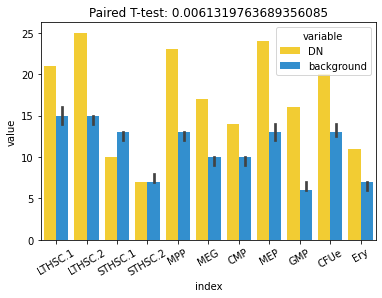

In [151]:
p=[]
for i in range(1,101):
    p.append(ttest_rel(a[0],a[i]).pvalue)
print (np.mean(p))
from scipy.stats import ttest_rel
b = a.reset_index()
c = b.melt(id_vars="index")
c.variable = (c.variable>0).astype(int)
c.variable  = c.variable.replace({0:"DN",1:'background'})
from numpy import median,mean
import matplotlib.pylab as plt
order=["LTHSC.1","LTHSC.2","STHSC.1","STHSC.2","MPP","MEG","CMP","MEP","GMP","CFUe","Ery"]
ax=sns.barplot(data=c,x="index",y="value",hue="variable",estimator=median,palette={'background':'#0073C2','DN':'#EFC000'},
               saturation=1,alpha=0.8,order=order,color="black",linewidth=1)
plt.xticks(rotation=30)
plt.title(f"Paired T-test: {np.mean(p)}")

#UP

In [144]:
predict_peak={}
for i in myDict:
    if "HSC" in i:
        continue
    print (i)
    predict_peak[i] = myDict[i][myDict[i].avg_log2FC>0].shape[0]
for i in myDict2:
    print (i)
    predict_peak[i] = myDict2[i][myDict2[i].avg_log2FC>0].shape[0]

CMP
MPP
CFUe
Ery
MEP
GMP
MEG
LTHSC.1
LTHSC.2
STHSC.1
STHSC.2


In [145]:
files = glob.glob("*random.dn.up.list")
background = pd.DataFrame()
for f in files:
    label = f.replace(".random.dn.up.list","")
    df = pd.read_csv(f,header=None,sep="\t")[1].tolist()
    background[label] = df
a=pd.DataFrame.from_dict(predict_peak,orient="index")
a=a.merge(background.transpose(),left_index=True,right_index=True)
a.columns = list(range(101))
a.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
CMP,9,2,5,4,5,7,5,4,5,4,...,4,4,4,8,6,4,3,7,6,6
MPP,43,22,23,28,25,37,32,28,30,35,...,38,32,28,26,37,31,29,27,30,30
CFUe,10,15,6,9,5,5,6,5,9,5,...,8,4,6,12,10,8,8,9,6,8
Ery,9,6,5,3,4,5,3,7,8,3,...,10,4,3,8,4,7,7,6,2,5
MEP,51,21,21,27,39,23,21,32,35,29,...,34,31,21,27,24,26,28,28,26,24


0.017517031467894226


Text(0.5, 1.0, 'Paired T-test: 0.017517031467894226')

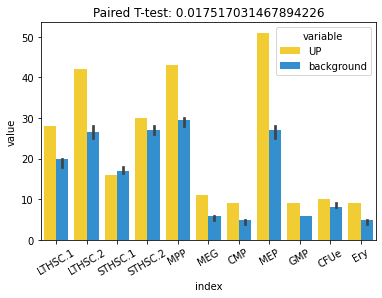

In [147]:
p=[]
for i in range(1,101):
    p.append(ttest_rel(a[0],a[i]).pvalue)
print (np.mean(p))
from scipy.stats import ttest_rel
b = a.reset_index()
c = b.melt(id_vars="index")
c.variable = (c.variable>0).astype(int)
c.variable  = c.variable.replace({0:"UP",1:'background'})
from numpy import median,mean
import matplotlib.pylab as plt
order=["LTHSC.1","LTHSC.2","STHSC.1","STHSC.2","MPP","MEG","CMP","MEP","GMP","CFUe","Ery"]
ax=sns.barplot(data=c,x="index",y="value",hue="variable",estimator=median,palette={'background':'#0073C2','UP':'#EFC000'},
               saturation=1,alpha=0.8,order=order,color="black",linewidth=1)
plt.xticks(rotation=30)
plt.title(f"Paired T-test: {np.mean(p)}")

In [152]:
glob.glob("*target2*list")

['STHSC.top1k.bed.target2.list',
 'GMP.top1k.bed.target2.list',
 'MEP.top1k.bed.target2.list',
 'Ery.top1k.bed.target2.list',
 'ce6aa371fa9b.bed.target2.list',
 'MEG.top1k.bed.target2.list',
 'CFUe.top1k.bed.target2.list',
 'MPP.top1k.bed.target2.list',
 'LTHSC.top1k.bed.target2.list',
 'CMP.top1k.bed.target2.list']

In [163]:
df = pd.read_csv("LTHSC.top1k.bed.target2.list",header=None)
df.head()

,0
0,Plscr1
1,Babam2
2,Rinl
3,Gm3376
4,Ccdc66


In [165]:
df[df[0].str.contains("Rps")].shape

(1681, 1)

In [158]:
for i in df[0].unique():
    print (i)

Plscr1
Babam2
Rinl
Gm3376
Ccdc66
Gadd45a
Olfr748
Mcc
4930594O21Rik
Fpr2
Pisd
Fstl3
Vash1
Ccm2l
Gm20268
Utp18
Arl14
Gm5148
AL583891.1
Gm35248
Man1a2
Grk5
H2al2c
Nsg2
Fam114a1
Arsg
Vmn1r78
Daxx
Gm46102
Pik3cb
Gm48833
Nme6
Crebl2
Slc38a11
Fnip1
4930405L22Rik
Aasdhppt
Sik1
Pfkfb4
Slc43a2
1700017L05Rik
Vmn2r121
1700029E06Rik
Ifi213
Maml3
Rbck1
9030204H09Rik
Vps8
Ermard
Dhx36
Klhl3
Gm11986
Cntln
Sh2b1
Dnajc27
Osbpl2
Mylk
Gm44202
Gm13849
Neu1
Hlf
Cyp2j5
Klf5
Spag6l
Fam217b
Shank3
Usp45
Gm42761
Dstyk
Abcc4
Etl4
Rgs14
Ppp5c
Spata6
Pxn
Ptch1
Zc2hc1a
Malat1
Specc1l
Rab11fip2
Gm13496
Usp7
Astx5
Dnajb6
Fmr1os
Rhob
Sde2
Lamb3
Ints6l
Gm43303
Tnks1bp1
Glipr2
Phka2
Astx1b
1700014F14Rik
Chd7
Arf6
Lin52
Phf20l1
Birc6
Lactb
Adipor1
Xlr
3830403N18Rik
Yipf4
Hmgb3
Ric8b
Sod2
Heca
Gm28351
Tbl1xr1
Dcpp3
Pomgnt1
Klhl25
C2cd5
Adgrl3
Nxt1
2810429I04Rik
Ppp1cb
1700048F04Rik
Mctp2
Hsd17b7
Psma6
Mbd6
Ceacam12
Zfy2
Nbn
AC137513.1
Bahcc1
4933402J10Rik
Epb41
Rpia
Drc1
Gm12065
Spag9
Olfr1350
Cst3
Gm49371
Tmem17
Ankar
Ta